# Exploratory Data Analysis (EDA)

This part of the project ww will analyze weather data to find any pattern and insights, data variables include:

> Time: YYYY-MM-DD 

> Longtitude and Latitude: Cover most of the globe

> CLDTOT: Cloud Coverage unit total cloud area fraction (0-1)

> Swnet_tavg: Net Shortwave Radiation Flux the amount of solar energy absorbed by Earth’s surface after subtracting the portion reflected back to space.  (W m-2)

> Rainf_tavg: Rain precipitation rate (kg m-2 s-1)

> Snowf_tavg: Snow precipitation rate (kg m-2 s-1)

> Tair_f_inst: Surface Air temp Kelvin Degree

> Wind_f_inst: Surface Wind Speed m s⁻¹ (meters per second) is the unit used to measure wind speed, showing how many meters the air moves in one second.

In [23]:
#import libraries
import pandas as pd
import seaborn
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt 

#display full columns
pd.set_option('display.max_columns', None)

In [25]:
#Load data 
df_Except_Cloud = pd.read_csv(r"D:\Oklo_weather_prediction\Dataset\Except_Cloud1X1.csv")
df_Cloud = pd.read_csv(r"D:\Oklo_weather_prediction\Dataset\Cloud1X1.csv")

In [3]:
#Join data based on time, lon, lat columns take all data
#df = pd.merge(df_Except_Cloud, df_Cloud, on=['time', 'lon', 'lat'], how='outer')
#df.head()



,time,bnds,lon,lat,time_bnds,Swnet_tavg,Snowf_tavg,Rainf_tavg,Wind_f_inst,Tair_f_inst,CLDTOT
0,2023-01-01,NaN,-180.0,-89.75,NaN,NaN,NaN,NaN,NaN,NaN,0.497406
1,2023-01-01,NaN,-180.0,-89.00,NaN,NaN,NaN,NaN,NaN,NaN,0.554248
2,2023-01-01,NaN,-180.0,-88.00,NaN,NaN,NaN,NaN,NaN,NaN,0.542849
3,2023-01-01,NaN,-180.0,-87.00,NaN,NaN,NaN,NaN,NaN,NaN,0.502070
4,2023-01-01,NaN,-180.0,-86.00,NaN,NaN,NaN,NaN,NaN,NaN,0.459127


In [ ]:
#optional export to csv
#df.to_csv(r"D:\Oklo_weather_prediction\Dataset\Final_Data.csv", index=False)

# Descriptive Statistics 

**Except_Cloud dataset**

In [26]:
df_Except_Cloud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592000 entries, 0 to 2591999
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   time         object 
 1   bnds         int64  
 2   lon          float64
 3   lat          float64
 4   time_bnds    object 
 5   Swnet_tavg   float64
 6   Snowf_tavg   float64
 7   Rainf_tavg   float64
 8   Wind_f_inst  float64
 9   Tair_f_inst  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 197.8+ MB


In [41]:
#Change date time column to datetime
df_Except_Cloud['time'] = pd.to_datetime(df_Except_Cloud['time'])

In [28]:
#Check null values for Except Cloud
df_Except_Cloud.isnull().sum()

time                 0
bnds                 0
lon                  0
lat                  0
time_bnds            0
Swnet_tavg     1864368
Snowf_tavg     1864368
Rainf_tavg     1864368
Wind_f_inst    1856400
Tair_f_inst    1856400
dtype: int64

In [ ]:
#remove null values
df_Except_Cloud = df_Except_Cloud.dropna()


In [33]:
#remoe bnds and time bnds column 
df_Except_Cloud = df_Except_Cloud.drop(columns=['bnds', 'time_bnds'])

In [35]:
#decriptive statistics
df_Except_Cloud.describe()

,lon,lat,Swnet_tavg,Snowf_tavg,Rainf_tavg,Wind_f_inst,Tair_f_inst
count,727632.0000,727632.0000,727632.0000,727632.0000,727632.0000,727632.0000,727632.0000
mean,17.7003,32.7821,139.7213,0.0000,0.0000,3.1789,283.0017
std,84.5542,31.9633,83.8980,0.0000,0.0000,1.4827,17.2986
min,-179.5000,-54.5000,0.0000,0.0000,0.0000,0.2636,225.5641
25%,-61.5000,10.5000,60.3472,0.0000,0.0000,1.9875,271.4141
50%,26.5000,39.5000,160.1171,0.0000,0.0000,3.0702,287.4795
75%,90.5000,59.5000,208.5617,0.0000,0.0000,4.2519,297.1284
max,179.5000,83.5000,356.5673,0.0001,0.0003,12.7873,314.7717


In [46]:
#Count values in the time column, ascending order time
df_Except_Cloud['time'].value_counts().sort_index(ascending=True)


time
2023-01-01    30318
2023-02-01    30318
2023-03-01    30318
2023-04-01    30318
2023-05-01    30318
2023-06-01    30318
2023-07-01    30318
2023-08-01    30318
2023-09-01    30318
2023-10-01    30318
2023-11-01    30318
2023-12-01    30318
2024-01-01    30318
2024-02-01    30318
2024-03-01    30318
2024-04-01    30318
2024-05-01    30318
2024-06-01    30318
2024-07-01    30318
2024-08-01    30318
2024-09-01    30318
2024-10-01    30318
2024-11-01    30318
2024-12-01    30318
Name: count, dtype: int64

**Cloud data**

In [37]:
df_Cloud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563840 entries, 0 to 1563839
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   time    1563840 non-null  object 
 1   lon     1563840 non-null  float64
 2   lat     1563840 non-null  float64
 3   CLDTOT  1563840 non-null  float64
dtypes: float64(3), object(1)
memory usage: 47.7+ MB


In [40]:
#change time column to datetime
df_Cloud['time'] = pd.to_datetime(df_Cloud['time'])

In [48]:
#null values
df_Cloud.isnull().sum()

time      0
lon       0
lat       0
CLDTOT    0
dtype: int64

In [43]:
#descriptive statistics
df_Cloud.describe()

,time,lon,lat,CLDTOT
count,1563840,1563840.0000,1563840.0000,1563840.0000
mean,2023-12-16 10:00:00,-0.5000,0.0000,0.6512
min,2023-01-01 00:00:00,-180.0000,-89.7500,0.0000
25%,2023-06-23 12:00:00,-90.2344,-45.0000,0.5355
50%,2023-12-16 12:00:00,-0.4688,-0.0000,0.6839
75%,2024-06-08 12:00:00,89.2969,45.0000,0.7901
max,2024-12-01 00:00:00,179.0625,89.7500,0.9960
std,NaN,103.9215,52.2447,0.1868


In [47]:
#Count values in the time column, ascending order time
df_Cloud['time'].value_counts().sort_index(ascending=True)

time
2023-01-01    65160
2023-02-01    65160
2023-03-01    65160
2023-04-01    65160
2023-05-01    65160
2023-06-01    65160
2023-07-01    65160
2023-08-01    65160
2023-09-01    65160
2023-10-01    65160
2023-11-01    65160
2023-12-01    65160
2024-01-01    65160
2024-02-01    65160
2024-03-01    65160
2024-04-01    65160
2024-05-01    65160
2024-06-01    65160
2024-07-01    65160
2024-08-01    65160
2024-09-01    65160
2024-10-01    65160
2024-11-01    65160
2024-12-01    65160
Name: count, dtype: int64

# EDA

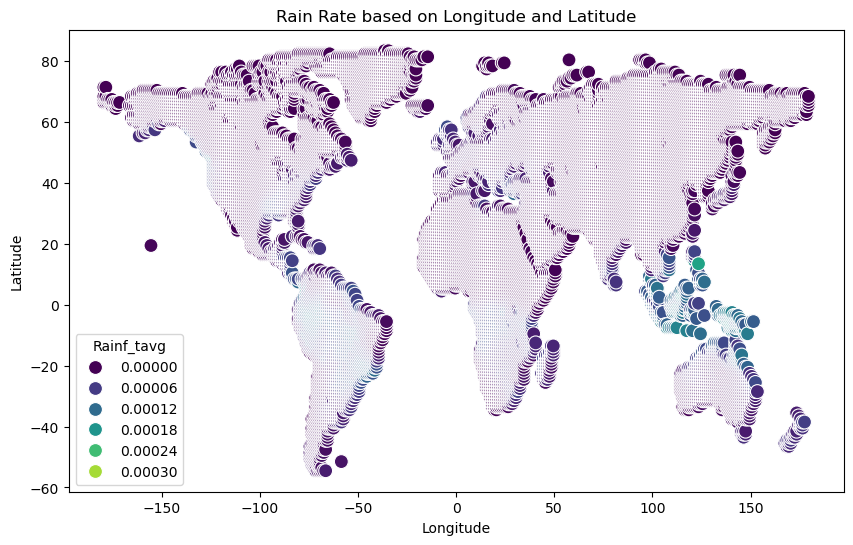

In [50]:
# See rain rate based on long and lat 
plt.figure(figsize=(10,6))
seaborn.scatterplot(data=df_Except_Cloud, x='lon', y='lat', hue='Rainf_tavg', palette='viridis', s=100)
plt.title('Rain Rate based on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

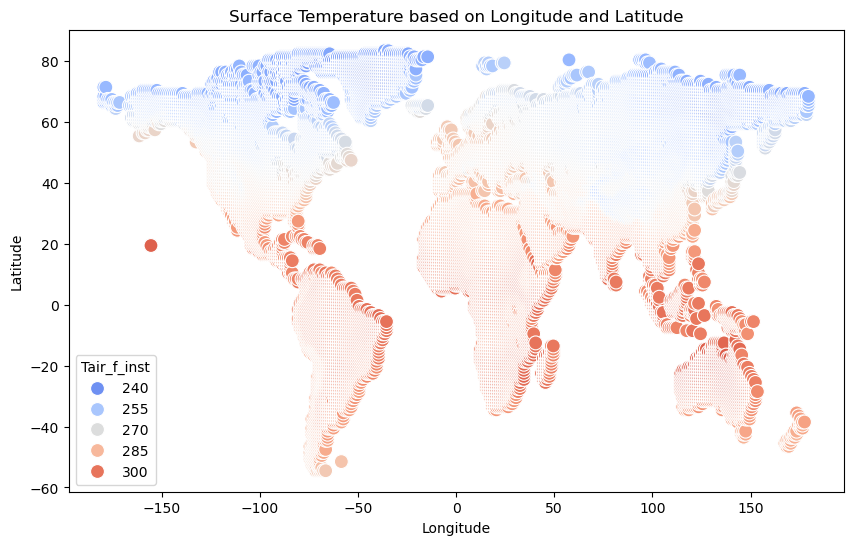

In [65]:
#See surface temperature based on long and lat
plt.figure(figsize=(10,6))
seaborn.scatterplot(data=df_Except_Cloud, x='lon', y='lat', hue='Tair_f_inst', palette='coolwarm', s=100)
plt.title('Surface Temperature based on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

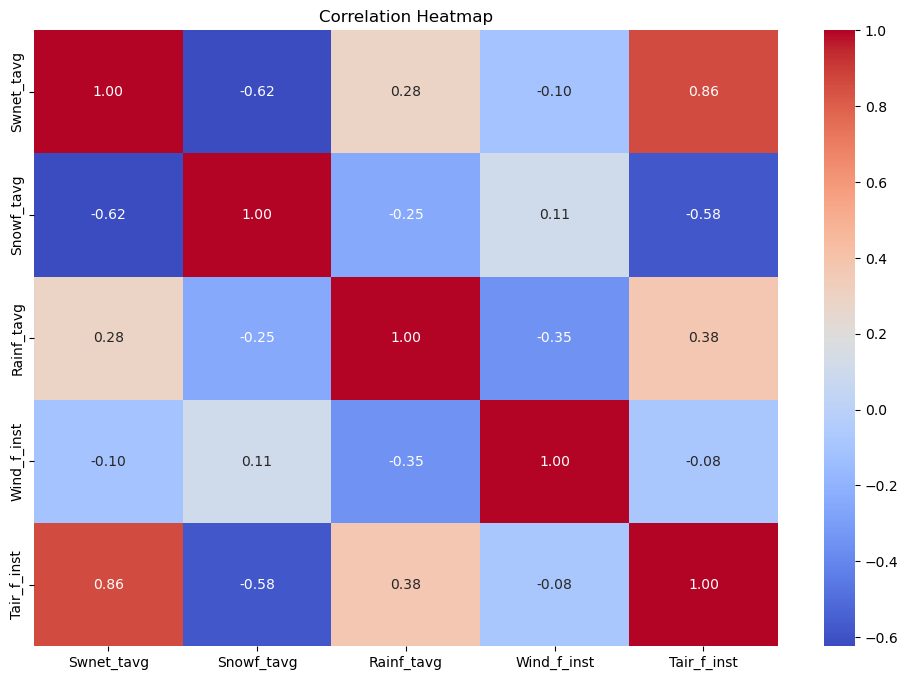

In [59]:
#heatmap to see correlation, remoeve time, lon, lat columns
plt.figure(figsize=(12,8))
correlation_matrix = df_Except_Cloud.drop(columns=['time', 'lon', 'lat']).corr()
seaborn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')


# Data Transformation

In [74]:
df_Except_Cloud

,time,lon,lat,Swnet_tavg,Snowf_tavg,Rainf_tavg,Wind_f_inst,Tair_f_inst
126,2023-01-01,-179.5000,66.5000,0.8892,0.0000,0.0000,3.5028,248.4179
127,2023-01-01,-179.5000,67.5000,0.5858,0.0000,0.0000,2.0911,245.0634
128,2023-01-01,-179.5000,68.5000,0.2905,0.0000,0.0000,2.8101,245.5313
131,2023-01-01,-179.5000,71.5000,0.0079,0.0000,0.0000,3.8585,245.6644
276,2023-01-01,-178.5000,66.5000,1.0184,0.0000,0.0000,3.8569,246.4398
...,...,...,...,...,...,...,...,...
2591828,2024-12-01,178.5000,68.5000,0.0000,0.0000,0.0000,1.4111,249.0616
2591975,2024-12-01,179.5000,65.5000,0.2068,0.0000,0.0000,3.5413,253.8666
2591976,2024-12-01,179.5000,66.5000,0.0205,0.0000,0.0000,3.8452,253.7947
2591977,2024-12-01,179.5000,67.5000,0.0000,0.0000,0.0000,2.2930,250.9063


In [75]:
#Compute average for all metrics group by  lon, lat
avg_metrics = df_Except_Cloud.groupby(['lon', 'lat']).mean().reset_index()
avg_metrics.head()  


,lon,lat,time,Swnet_tavg,Snowf_tavg,Rainf_tavg,Wind_f_inst,Tair_f_inst
0,-179.5000,66.5000,2023-12-16 10:00:00,52.2031,0.0000,0.0000,2.8330,264.6649
1,-179.5000,67.5000,2023-12-16 10:00:00,50.4013,0.0000,0.0000,2.0598,261.5954
2,-179.5000,68.5000,2023-12-16 10:00:00,41.7560,0.0000,0.0000,2.5043,261.7903
3,-179.5000,71.5000,2023-12-16 10:00:00,37.0418,0.0000,0.0000,3.6644,260.6659
4,-178.5000,66.5000,2023-12-16 10:00:00,50.8024,0.0000,0.0000,3.1198,262.6238


In [76]:
#create threshold to clasify monthly pattern 
'''
We will use the annual average method to classify weather patterns based on the following criteria:
Classify Snowy if its Cold and Snowy
Classify rain if it high rainfall 
Classify Windy if windy is strong 
Sunny Other wise ,
Cloudy will be classified in Cloud dataset

'''

#Join data with their annual metric s average in avg_metrics
df_Except_Cloud = pd.merge(df_Except_Cloud, avg_metrics, on=['lon', 'lat'], suffixes=('', '_avg'))
df_Except_Cloud.head()

,time,lon,lat,Swnet_tavg,Snowf_tavg,Rainf_tavg,Wind_f_inst,Tair_f_inst,time_avg,Swnet_tavg_avg,Snowf_tavg_avg,Rainf_tavg_avg,Wind_f_inst_avg,Tair_f_inst_avg
0,2023-01-01,-179.5000,66.5000,0.8892,0.0000,0.0000,3.5028,248.4179,2023-12-16 10:00:00,52.2031,0.0000,0.0000,2.8330,264.6649
1,2023-01-01,-179.5000,67.5000,0.5858,0.0000,0.0000,2.0911,245.0634,2023-12-16 10:00:00,50.4013,0.0000,0.0000,2.0598,261.5954
2,2023-01-01,-179.5000,68.5000,0.2905,0.0000,0.0000,2.8101,245.5313,2023-12-16 10:00:00,41.7560,0.0000,0.0000,2.5043,261.7903
3,2023-01-01,-179.5000,71.5000,0.0079,0.0000,0.0000,3.8585,245.6644,2023-12-16 10:00:00,37.0418,0.0000,0.0000,3.6644,260.6659
4,2023-01-01,-178.5000,66.5000,1.0184,0.0000,0.0000,3.8569,246.4398,2023-12-16 10:00:00,50.8024,0.0000,0.0000,3.1198,262.6238


In [95]:
df_Except_Cloud

,time,lon,lat,Swnet_tavg,Snowf_tavg,Rainf_tavg,Wind_f_inst,Tair_f_inst,time_avg,Swnet_tavg_avg,Snowf_tavg_avg,Rainf_tavg_avg,Wind_f_inst_avg,Tair_f_inst_avg,Weather_Pattern
0,2023-01-01,-179.5000,66.5000,0.8892,0.0000,0.0000,3.5028,248.4179,2023-12-16 10:00:00,52.2031,0.0000,0.0000,2.8330,264.6649,Sunny
1,2023-01-01,-179.5000,67.5000,0.5858,0.0000,0.0000,2.0911,245.0634,2023-12-16 10:00:00,50.4013,0.0000,0.0000,2.0598,261.5954,Snowy
2,2023-01-01,-179.5000,68.5000,0.2905,0.0000,0.0000,2.8101,245.5313,2023-12-16 10:00:00,41.7560,0.0000,0.0000,2.5043,261.7903,Sunny
3,2023-01-01,-179.5000,71.5000,0.0079,0.0000,0.0000,3.8585,245.6644,2023-12-16 10:00:00,37.0418,0.0000,0.0000,3.6644,260.6659,Sunny
4,2023-01-01,-178.5000,66.5000,1.0184,0.0000,0.0000,3.8569,246.4398,2023-12-16 10:00:00,50.8024,0.0000,0.0000,3.1198,262.6238,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727627,2024-12-01,178.5000,68.5000,0.0000,0.0000,0.0000,1.4111,249.0616,2023-12-16 10:00:00,50.2423,0.0000,0.0000,1.9461,261.8238,Snowy
727628,2024-12-01,179.5000,65.5000,0.2068,0.0000,0.0000,3.5413,253.8666,2023-12-16 10:00:00,53.2595,0.0000,0.0000,3.0659,265.0791,Snowy
727629,2024-12-01,179.5000,66.5000,0.0205,0.0000,0.0000,3.8452,253.7947,2023-12-16 10:00:00,54.7766,0.0000,0.0000,2.6587,265.4707,Snowy
727630,2024-12-01,179.5000,67.5000,0.0000,0.0000,0.0000,2.2930,250.9063,2023-12-16 10:00:00,52.5858,0.0000,0.0000,1.9892,262.6650,Snowy


In [84]:
#Classyfy weather pattern
def classify_weather(row):
    if row['Tair_f_inst'] < row['Tair_f_inst_avg'] and row['Snowf_tavg'] > row['Snowf_tavg_avg']:
        return 'Snowy'
    elif row['Rainf_tavg'] > row['Rainf_tavg_avg']:
        return 'Rainy'
    else:
        return 'Sunny'

df_Except_Cloud['Weather_Pattern'] = df_Except_Cloud.apply(classify_weather, axis=1)

In [85]:
df_Except_Cloud

,time,lon,lat,Swnet_tavg,Snowf_tavg,Rainf_tavg,Wind_f_inst,Tair_f_inst,time_avg,Swnet_tavg_avg,Snowf_tavg_avg,Rainf_tavg_avg,Wind_f_inst_avg,Tair_f_inst_avg,Weather_Pattern
0,2023-01-01,-179.5000,66.5000,0.8892,0.0000,0.0000,3.5028,248.4179,2023-12-16 10:00:00,52.2031,0.0000,0.0000,2.8330,264.6649,Sunny
1,2023-01-01,-179.5000,67.5000,0.5858,0.0000,0.0000,2.0911,245.0634,2023-12-16 10:00:00,50.4013,0.0000,0.0000,2.0598,261.5954,Snowy
2,2023-01-01,-179.5000,68.5000,0.2905,0.0000,0.0000,2.8101,245.5313,2023-12-16 10:00:00,41.7560,0.0000,0.0000,2.5043,261.7903,Sunny
3,2023-01-01,-179.5000,71.5000,0.0079,0.0000,0.0000,3.8585,245.6644,2023-12-16 10:00:00,37.0418,0.0000,0.0000,3.6644,260.6659,Sunny
4,2023-01-01,-178.5000,66.5000,1.0184,0.0000,0.0000,3.8569,246.4398,2023-12-16 10:00:00,50.8024,0.0000,0.0000,3.1198,262.6238,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727627,2024-12-01,178.5000,68.5000,0.0000,0.0000,0.0000,1.4111,249.0616,2023-12-16 10:00:00,50.2423,0.0000,0.0000,1.9461,261.8238,Snowy
727628,2024-12-01,179.5000,65.5000,0.2068,0.0000,0.0000,3.5413,253.8666,2023-12-16 10:00:00,53.2595,0.0000,0.0000,3.0659,265.0791,Snowy
727629,2024-12-01,179.5000,66.5000,0.0205,0.0000,0.0000,3.8452,253.7947,2023-12-16 10:00:00,54.7766,0.0000,0.0000,2.6587,265.4707,Snowy
727630,2024-12-01,179.5000,67.5000,0.0000,0.0000,0.0000,2.2930,250.9063,2023-12-16 10:00:00,52.5858,0.0000,0.0000,1.9892,262.6650,Snowy


In [86]:
#Count weather pattern
df_Except_Cloud['Weather_Pattern'].value_counts(normalize=True)

Weather_Pattern
Sunny   0.4452
Rainy   0.3667
Snowy   0.1881
Name: proportion, dtype: float64

In [94]:
df_windy = df_Except_Cloud['Wind_f_inst_avg' ]

#Turn to dataframe
df_windy = pd.DataFrame(df_windy)

#export to csv
df_windy.to_csv(r"D:\Oklo_weather_prediction\Dataset\Windy.csv", index=False)